In [6]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sorting Algorithms

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        merge_sort(left)
        merge_sort(right)

        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1
    return arr

def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[largest] < arr[left]:
        largest = left

    if right < n and arr[largest] < arr[right]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

    return arr

# Dataset Generation

def generate_dataset(size, pattern):
    if pattern == "random":
        return np.random.randint(0, 10000, size=size)
    elif pattern == "sorted":
        return np.arange(size)
    elif pattern == "reverse_sorted":
        return np.arange(size, 0, -1)
    elif pattern == "nearly_sorted":
        arr = np.arange(size)
        for _ in range(size // 10):
            idx1, idx2 = np.random.randint(0, size, 2)
            arr[idx1], arr[idx2] = arr[idx2], arr[idx1]
        return arr

# Feature Extraction

def extract_features(arr):
    return {
        "size": len(arr),
        "mean": np.mean(arr),
        "std": np.std(arr),
        "sortedness": np.sum(np.diff(arr) >= 0) / (len(arr) - 1),
    }

# Main Workflow

def main():
    # Generate datasets
    patterns = ["random", "sorted", "reverse_sorted", "nearly_sorted"]
    dataset = []
    labels = []

    for pattern in patterns:
        for size in [100, 500, 1000, 5000]:
            for _ in range(50):
                arr = generate_dataset(size, pattern)

                # Extract features
                features = extract_features(arr)
                dataset.append(list(features.values()))

                # Measure sorting performance
                times = {}
                for algo, func in zip(["quick", "merge", "heap"], [quick_sort, merge_sort, heap_sort]):
                    start = time.time()
                    func(arr.copy())
                    times[algo] = time.time() - start

                # Label with the fastest algorithm
                best_algo = min(times, key=times.get)
                labels.append(best_algo)

    # Prepare dataset for ML
    df = pd.DataFrame(dataset, columns=["size", "mean", "std", "sortedness"])
    df["label"] = labels

    # Split dataset
    X = df.drop("label", axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Classifier
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

    # Save the model and dataset
    df.to_csv("sorting_dataset.csv", index=False)
    print("Dataset saved as 'sorting_dataset.csv'")

if __name__ == "__main__":
    main()


Model Accuracy: 85.00%
Dataset saved as 'sorting_dataset.csv'


Model Accuracy: 88.12%


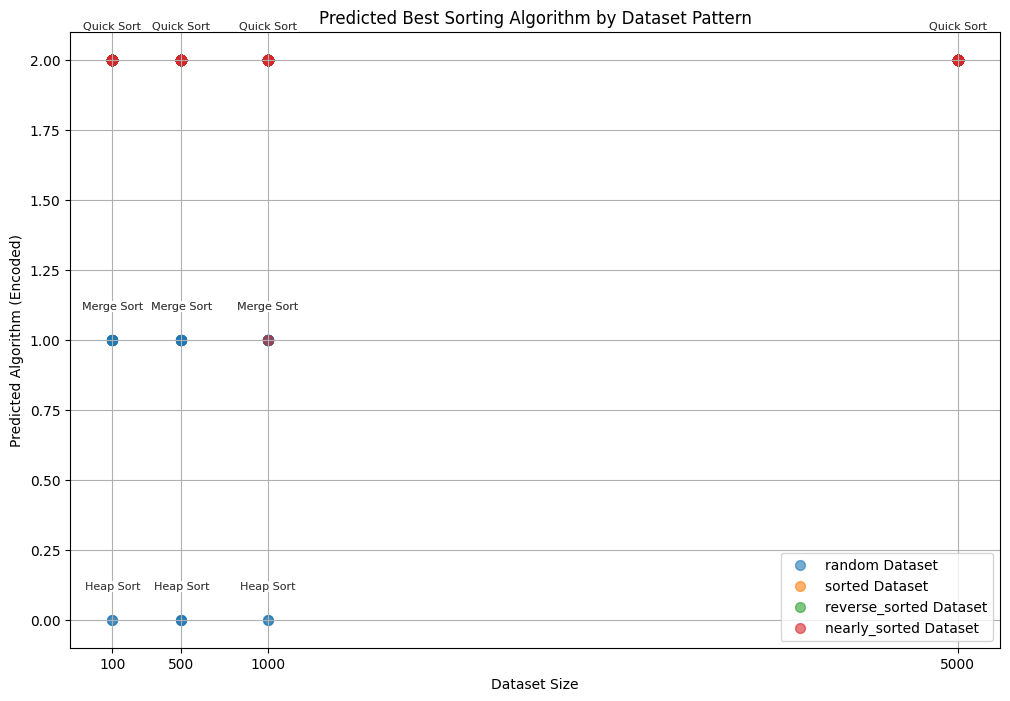

In [6]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Sorting Algorithms
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        merge_sort(left)
        merge_sort(right)

        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1
    return arr

def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[largest] < arr[left]:
        largest = left

    if right < n and arr[largest] < arr[right]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

    return arr

# Dataset Generation
def generate_dataset(size, pattern):
    if pattern == "random":
        return np.random.randint(0, 10000, size=size)
    elif pattern == "sorted":
        return np.arange(size)
    elif pattern == "reverse_sorted":
        return np.arange(size, 0, -1)
    elif pattern == "nearly_sorted":
        arr = np.arange(size)
        for _ in range(size // 10):
            idx1, idx2 = np.random.randint(0, size, 2)
            arr[idx1], arr[idx2] = arr[idx2], arr[idx1]
        return arr

# Feature Extraction
def extract_features(arr):
    return {
        "size": len(arr),
        "mean": np.mean(arr),
        "std": np.std(arr),
        "sortedness": np.sum(np.diff(arr) >= 0) / (len(arr) - 1),
    }

# Main Workflow
def main():
    # Dataset patterns and sizes
    patterns = ["random", "sorted", "reverse_sorted", "nearly_sorted"]
    sizes = [100, 500, 1000, 5000]

    dataset = []
    labels = []
    patterns_list = []

    for pattern in patterns:
        for size in sizes:
            for _ in range(50):
                arr = generate_dataset(size, pattern)

                # Extract features
                features = extract_features(arr)
                dataset.append(list(features.values()))
                patterns_list.append(pattern)

                # Measure sorting performance
                times = {}
                for algo_name, algo_func in zip(["Quick Sort", "Merge Sort", "Heap Sort"], [quick_sort, merge_sort, heap_sort]):
                    arr_copy = arr.copy()
                    start_time = time.time()
                    algo_func(arr_copy)
                    times[algo_name] = time.time() - start_time

                # Label with the fastest algorithm
                best_algo = min(times, key=times.get)
                labels.append(best_algo)

    # Prepare dataset for ML
    df = pd.DataFrame(dataset, columns=["size", "mean", "std", "sortedness"])
    df["pattern"] = patterns_list
    df["label"] = labels

    # Encode labels
    le = LabelEncoder()
    df["label"] = le.fit_transform(df["label"])

    # Split dataset
    X = df.drop(["label", "pattern"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Classifier
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

    predictions = model.predict(X)
    df["predicted_label"] = predictions
    df["predicted_algorithm"] = le.inverse_transform(df["predicted_label"])

    # Visualize predictions with explicit algorithm labels
    plt.figure(figsize=(12, 8))

    for pattern in patterns:
        subset = df[df["pattern"] == pattern]
        # Scatter plot for data points
        plt.scatter(
            subset["size"],
            subset["predicted_label"],
            label=f"{pattern} Dataset",
            alpha=0.6,
            s=50,  # Increase dot size for visibility
        )
        # Add text labels slightly offset from the points
        for idx, row in subset.iterrows():
            plt.text(
                row["size"],
                row["predicted_label"] + 0.1,  # Offset the text vertically
                row["predicted_algorithm"],
                fontsize=8,
                ha="center",
                va="bottom",
                alpha=0.7,
                bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=0.5),
            )

    plt.title("Predicted Best Sorting Algorithm by Dataset Pattern")
    plt.xlabel("Dataset Size")
    plt.ylabel("Predicted Algorithm (Encoded)")
    plt.xticks(sizes)
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    main()
